In [1]:
#  Hyperparameter Tuning

# The optimal values of hyperparameters are determined by performing cross validation
# multiple times and selecting the the hyperparameter with mininmum mse (loss function)

# Python Provides Model Trainers with inbuilt Hyperparameter Tuners :-
#       - LassoCV (Model is trained on Lasso Regression Model and Cross Validation is done to get optimal value of λ₁)
#       - RidgeCV (Model is trained on Ridge Regression Model and Cross Validation is done to get optimal value of λ₂)
#       - ElasticNetCV (Model is trained on Ridge Regression Model and Cross Validation is done to get optimal value of λ₁ and λ₂)

In [2]:
#  Parameters used for LinearModels with CV :-
# LinearModelCV(
#     "alphas": array of hyperparameters to try - If given None, the algo with select on its own
#     "n_alphas": maximum no of alphas to try
#     "max_iter": maximum iterations for gradient descent while trying each alpha (hyperparameter)
#     "cv": Number of folds for performing cross validation
#     "selection": method to form folds (cyclic/random)
#     "random_state": allows for reproducibility (how training data is split during cross validation)
#     "n_jobs": total processors used while training the model
# 
#     "l1_ratio": Ratio of L1 and L2 Regularization Strength to try (0: pure Ridge, 1: pure Lasso)
# )

# Training the Model Returns the following parameters
# LinearModelCV.fit() -> {
#     "alpha_": Best Alpha (hyperparameter) Found during all cross-validations
#     "alphas_": All Alphas (hyperparameter) tried
#     "mse_path_": All MSE for each alpha (hyperparameter) tried
#     "coeff_": Usual Meaning
#     "intercept_": Usual Meaning
# }

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plotter
%matplotlib inline

In [2]:
# All Steps except feature selection and Multicollinearity same as LinearRegression without Regularization

dataset = pd.read_csv('./datasets/algerian-forest-fires-cleaned.csv')
dataset.drop(['month', 'day', 'year', 'Fire'], axis = 1, inplace = True)

# Aliasing Independent and Dependent Features
X = dataset.iloc[:, :-1]
Y = dataset.iloc[:, -1]

# No Need for Feature Selection and Multi-Collinearity Check. Model Hyperparameters will handle itself

# Dataset Split
from sklearn.model_selection import train_test_split
X_Train, X_Test, Y_Train, Y_Test = train_test_split(X, Y, test_size = 0.25, random_state = 13)

# Standardization of Input Features
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

scaler.fit(X_Train)
X_Train_Norm = pd.DataFrame(scaler.transform(X_Train), columns = X_Train.columns)
X_Test_Norm = pd.DataFrame(scaler.transform(X_Test), columns = X_Test.columns)
Y.describe()

count    243.000000
mean       7.035391
std        7.440568
min        0.000000
25%        0.700000
50%        4.200000
75%       11.450000
max       31.100000
Name: FWI, dtype: float64

### Ridge Regression with CV

In [5]:
# Ridge Regression Model Training with Cross Validation
from sklearn.linear_model import RidgeCV

model_ridge = RidgeCV(alphas = [0.1, 0.5, 1, 3, 7, 10], store_cv_results = True)
model_ridge.fit(X_Train_Norm, Y_Train)

# Predicting for Test Data and Visualizing
Y_Test_Predicted_RidgeCV = model_ridge.predict(X_Test_Norm)
Y_Train_Predicted_RidgeCV = model_ridge.predict(X_Train_Norm)

# Optimization Path:
print(model_ridge.cv_results_)
print('Tried', model_ridge.cv_results_.shape[0]*model_ridge.cv_results_.shape[1], 'values')
print("Best λ =", model_ridge.alpha_)
print("Minimum Error =", model_ridge.best_score_)

[[0.50367756 0.50503251 0.5302796  0.70036421 1.11907412 1.45097984]
 [1.20384113 1.18770668 1.18493432 1.21644347 1.29726565 1.35011581]
 [0.15352351 0.15425558 0.1701826  0.286196   0.61185633 0.89343973]
 ...
 [0.15031985 0.15971842 0.16609608 0.17563239 0.1789614  0.17818515]
 [0.96331949 0.94726571 0.95861874 1.08785283 1.41541991 1.67108973]
 [2.15193295 2.38249884 2.5525089  2.88442567 3.23092891 3.4335449 ]]
Tried 1092 values
Best λ = 0.1
Minimum Error = -2.0447591950059683


In [6]:
# Performance Metrics
from sklearn.metrics import root_mean_squared_error, mean_absolute_error, r2_score

print('For Test Dataset')
print('Mean Absolute Error:', mean_absolute_error(Y_Test, Y_Test_Predicted_RidgeCV))
print('Root Mean Square Error:', root_mean_squared_error(Y_Test, Y_Test_Predicted_RidgeCV))
print(f'R² Score: {round(100*r2_score(Y_Test, Y_Test_Predicted_RidgeCV),2)}%')
print()

print('For Training Dataset')
print('Mean Absolute Error:', mean_absolute_error(Y_Train, Y_Train_Predicted_RidgeCV))
print('Root Mean Square Error:', root_mean_squared_error(Y_Train, Y_Train_Predicted_RidgeCV))
print(f'R² Score: {round(100*r2_score(Y_Train, Y_Train_Predicted_RidgeCV),2)}%')

For Test Dataset
Mean Absolute Error: 0.5487682158548561
Root Mean Square Error: 0.8316231276242684
R² Score: 98.5%

For Training Dataset
Mean Absolute Error: 0.6524776939272787
Root Mean Square Error: 1.2657502169377681
R² Score: 97.24%


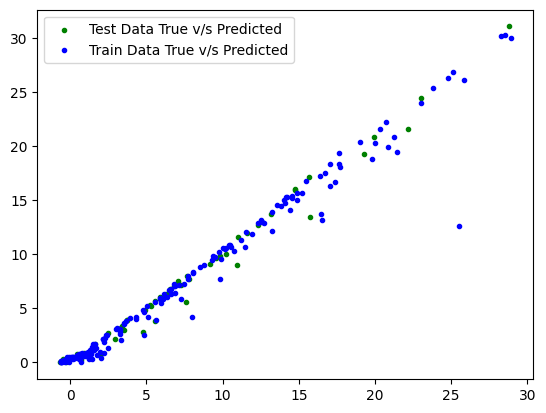

In [7]:
plotter.scatter(Y_Test_Predicted_RidgeCV, Y_Test, marker = '.', color = 'green', label = 'Test Data True v/s Predicted')
plotter.scatter(Y_Train_Predicted_RidgeCV, Y_Train, marker = '.', color = 'blue', label = 'Train Data True v/s Predicted')
plotter.legend()
plotter.show()

### Lasso Regression with CV

Tried 50 values
Best λ = 0.05818464436412967
Minimum Error = 2.069099847661735


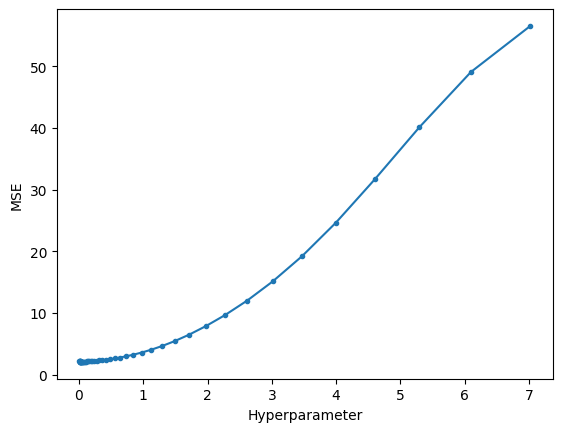

In [8]:
# Lasso Regression Model Training with Cross Validation
from sklearn.linear_model import LassoCV

model_lasso = LassoCV(alphas = 50, cv = 5, random_state = 5, max_iter = 5000, n_jobs = -1)
model_lasso.fit(X_Train_Norm, Y_Train)

# Predicting for Test Data and Visualizing
Y_Test_Predicted_LassoCV = model_lasso.predict(X_Test_Norm)
Y_Train_Predicted_LassoCV = model_lasso.predict(X_Train_Norm)

# Optimization Path:
plotter.xlabel('Hyperparameter')
plotter.ylabel('MSE')
MSE = []
for row in model_lasso.mse_path_:
    MSE.append(row.mean())
MSE = np.array(MSE)
plotter.plot(model_lasso.alphas_[model_lasso.alphas_.argsort()], MSE[model_lasso.alphas_.argsort()], marker = '.')

print('Tried', model_lasso.mse_path_.shape[0], 'values')
print("Best λ =", model_lasso.alpha_)
print("Minimum Error =", min(MSE))

In [9]:
# Performance Metrics
from sklearn.metrics import root_mean_squared_error, mean_absolute_error, r2_score

print('For Test Dataset')
print('Mean Absolute Error:', mean_absolute_error(Y_Test, Y_Test_Predicted_LassoCV))
print('Root Mean Square Error:', root_mean_squared_error(Y_Test, Y_Test_Predicted_LassoCV))
print(f'R² Score: {round(100*r2_score(Y_Test, Y_Test_Predicted_LassoCV),2)}%')
print()

print('For Training Dataset')
print('Mean Absolute Error:', mean_absolute_error(Y_Train, Y_Train_Predicted_LassoCV))
print('Root Mean Square Error:', root_mean_squared_error(Y_Train, Y_Train_Predicted_LassoCV))
print(f'R² Score: {round(100*r2_score(Y_Train, Y_Train_Predicted_LassoCV),2)}%')

For Test Dataset
Mean Absolute Error: 0.5814452004984451
Root Mean Square Error: 0.870435505662173
R² Score: 98.36%

For Training Dataset
Mean Absolute Error: 0.6963352191162362
Root Mean Square Error: 1.2882935652719252
R² Score: 97.14%


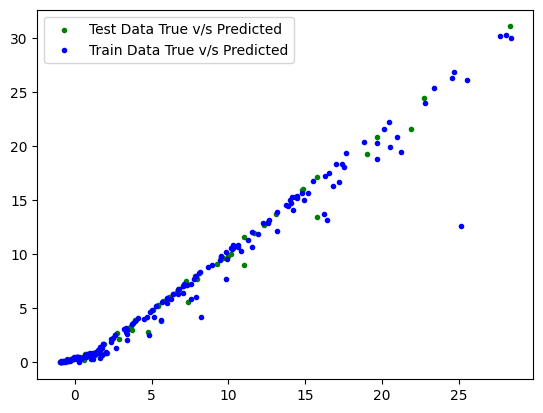

In [10]:
plotter.scatter(Y_Test_Predicted_LassoCV, Y_Test, marker = '.', color = 'green', label = 'Test Data True v/s Predicted')
plotter.scatter(Y_Train_Predicted_LassoCV, Y_Train, marker = '.', color = 'blue', label = 'Train Data True v/s Predicted')
plotter.legend()
plotter.show()

### ElasticNet Regression with CV

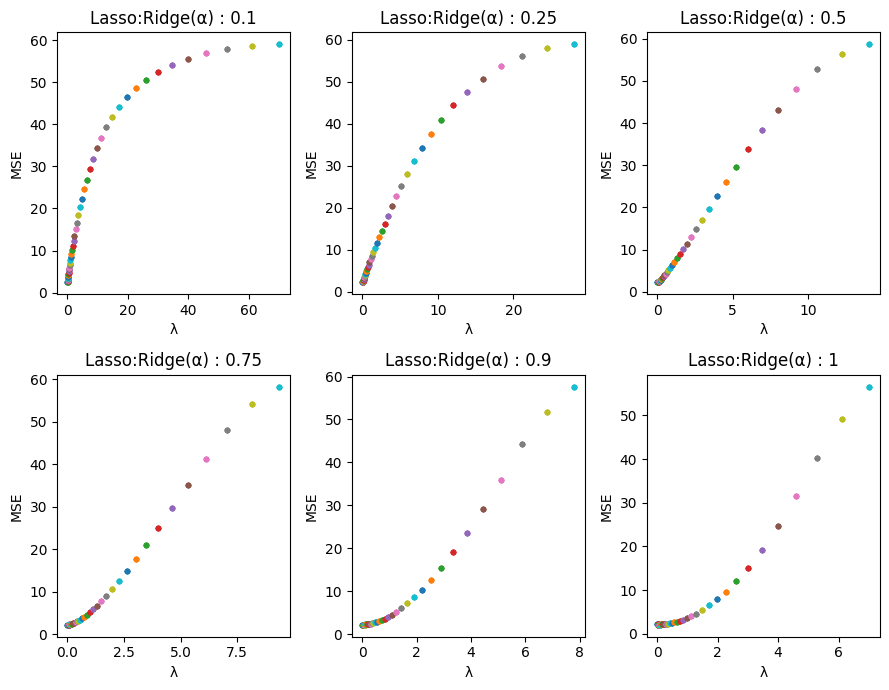

Tried 6 values
Best λ = 0.05818464436412967
Minimum Error = 2.069099847661735


In [11]:
# ElasticNet Regression Model Training with Cross Validation
from sklearn.linear_model import ElasticNetCV

ratios = [0.1, 0.25, 0.5, 0.75, 0.9, 1]
model_elasticnet = ElasticNetCV(
    l1_ratio = ratios, 
    alphas = 50,  
    max_iter = 5000, 
    cv = 5, 
    random_state = 10, 
    n_jobs = -1
)
model_elasticnet.fit(X_Train_Norm, Y_Train)

# Predicting for Test Data and Visualizing
Y_Test_Predicted_ElasticNetCV = model_elasticnet.predict(X_Test_Norm)
Y_Train_Predicted_ElasticNetCV = model_elasticnet.predict(X_Train_Norm)

# Optimization Path:
plotter.figure(figsize = (9, 7))
for i in range(0,len(ratios)):
    MSE = []
    for row in model_elasticnet.mse_path_[i]:
        MSE.append(row.mean())

    MSE = np.array(MSE)
    plotter.subplot(2,3,i+1)
    plotter.title(f'Lasso:Ridge(α) : {ratios[i]}')
    plotter.xlabel('λ')
    plotter.ylabel('MSE')
    plotter.plot(model_elasticnet.alphas_[i][model_elasticnet.alphas_.argsort()], MSE[model_elasticnet.alphas_.argsort()], marker = '.')

plotter.tight_layout()
plotter.show()

print('Tried', model_elasticnet.mse_path_.shape[0], 'values')
print("Best λ =", model_elasticnet.alpha_)
print("Minimum Error =", min(MSE))

In [12]:
# Performance Metrics
from sklearn.metrics import root_mean_squared_error, mean_absolute_error, r2_score

print('For Test Dataset')
print('Mean Absolute Error:', mean_absolute_error(Y_Test, Y_Test_Predicted_LassoCV))
print('Root Mean Square Error:', root_mean_squared_error(Y_Test, Y_Test_Predicted_LassoCV))
print(f'R² Score: {round(100*r2_score(Y_Test, Y_Test_Predicted_LassoCV),2)}%')
print()

print('For Training Dataset')
print('Mean Absolute Error:', mean_absolute_error(Y_Train, Y_Train_Predicted_LassoCV))
print('Root Mean Square Error:', root_mean_squared_error(Y_Train, Y_Train_Predicted_LassoCV))
print(f'R² Score: {round(100*r2_score(Y_Train, Y_Train_Predicted_LassoCV),2)}%')

For Test Dataset
Mean Absolute Error: 0.5814452004984451
Root Mean Square Error: 0.870435505662173
R² Score: 98.36%

For Training Dataset
Mean Absolute Error: 0.6963352191162362
Root Mean Square Error: 1.2882935652719252
R² Score: 97.14%


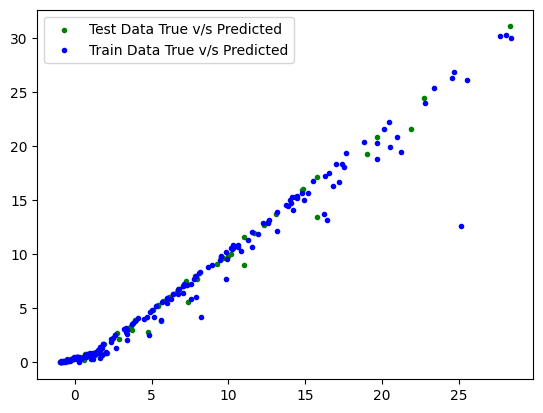

In [13]:
plotter.scatter(Y_Test_Predicted_LassoCV, Y_Test, marker = '.', color = 'green', label = 'Test Data True v/s Predicted')
plotter.scatter(Y_Train_Predicted_LassoCV, Y_Train, marker = '.', color = 'blue', label = 'Train Data True v/s Predicted')
plotter.legend()
plotter.show()

In [14]:
import pickle
pickle.dump(scaler, file = open('.\\models\\scaler.pkl', 'wb'))
pickle.dump(model_ridge, file = open('.\\models\\ridge.pkl', 'wb'))
pickle.dump(model_lasso, file = open('.\\models\\lasso.pkl', 'wb'))
pickle.dump(model_elasticnet, file = open('.\\models\\elasticnet.pkl', 'wb'))